# Lab 2 Probability, Distributions, and Statistical Questions

Igor Banin, Anthony Joo

## Problem 1

Average cosmic ray background: 5

Average gamma rays emitted by source: 8

A) Show how the probability distribution of the background changes as you integrate (sum) for more days.

In [26]:
%matplotlib inline
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy
from scipy import stats
from scipy.stats import chi2_contingency

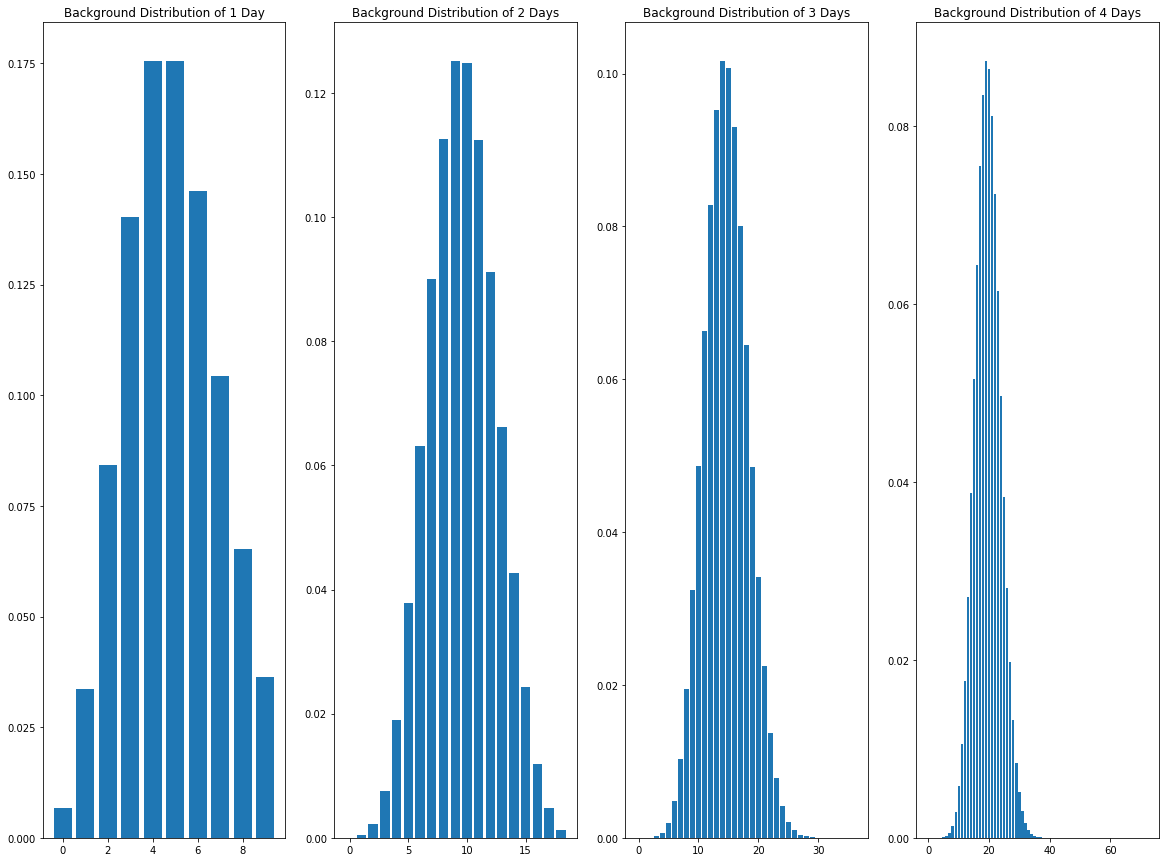

In [7]:
plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots(1, 4)
mu = 5 #average cosmic ray background
x = np.arange(0,10)
ax[0].set_title("Background Distribution of 1 Day")
ax[0].bar(x, stats.poisson.pmf(x, mu))

a = np.convolve(stats.poisson.pmf(x, mu), stats.poisson.pmf(x, mu))
x = np.arange(0, len(a))
ax[1].set_title("Background Distribution of 2 Days")
ax[1].bar(x, a)
for i in range(2,4):
    a = np.convolve(a, stats.poisson.pmf(x, mu))
    x = np.arange(0, len(a))
    ax[i].set_title("Background Distribution of " + str(i + 1) + " Days")
    ax[i].bar(x, a)
b = a

B) Show that after 5 days, the summed probability distribution is still a Poisson distribution. Explain why this makes sense from a mathematical and conceptual point of view.

Chi-square value:  290556.0000000001 P-value:  0.0


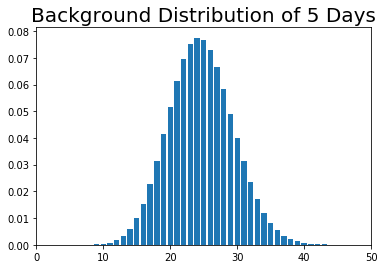

In [28]:
fig, ax = plt.subplots(1, 1)
d = np.convolve(b, stats.poisson.pmf(x, mu))
x = np.arange(0, len(d))
ax.set_title("Background Distribution of 5 Days", fontsize='20')
plt.xlim(0, 50)
ax.bar(x, d)

table = pd.crosstab(d, stats.poisson.pmf(x, mu))
chi2, p, dof, expected = chi2_contingency(table.values)
print("Chi-square value: ", chi2, " P-value: ", p)

Running the 5 times convolved poisson distriution and the regular poisson distribution under the goodness of fit, chi squared test. We find that the p value = 0 < 0.05: therefore we can reject the null hypothesis and conclude that the distributions are indeed correlated with one another. That is to say that the summed probability distribution is still a poisson distribution. We know this because when we sum two poisson distribution equations we get another poisson looking distribution equations. 

C) Show how the probability distribution evolves as you average days. Calculate for many different ranges of days, and explore the shape of the distribution as the number of days becomes larger. Discuss this in relation to both B) and the central limit theoem.

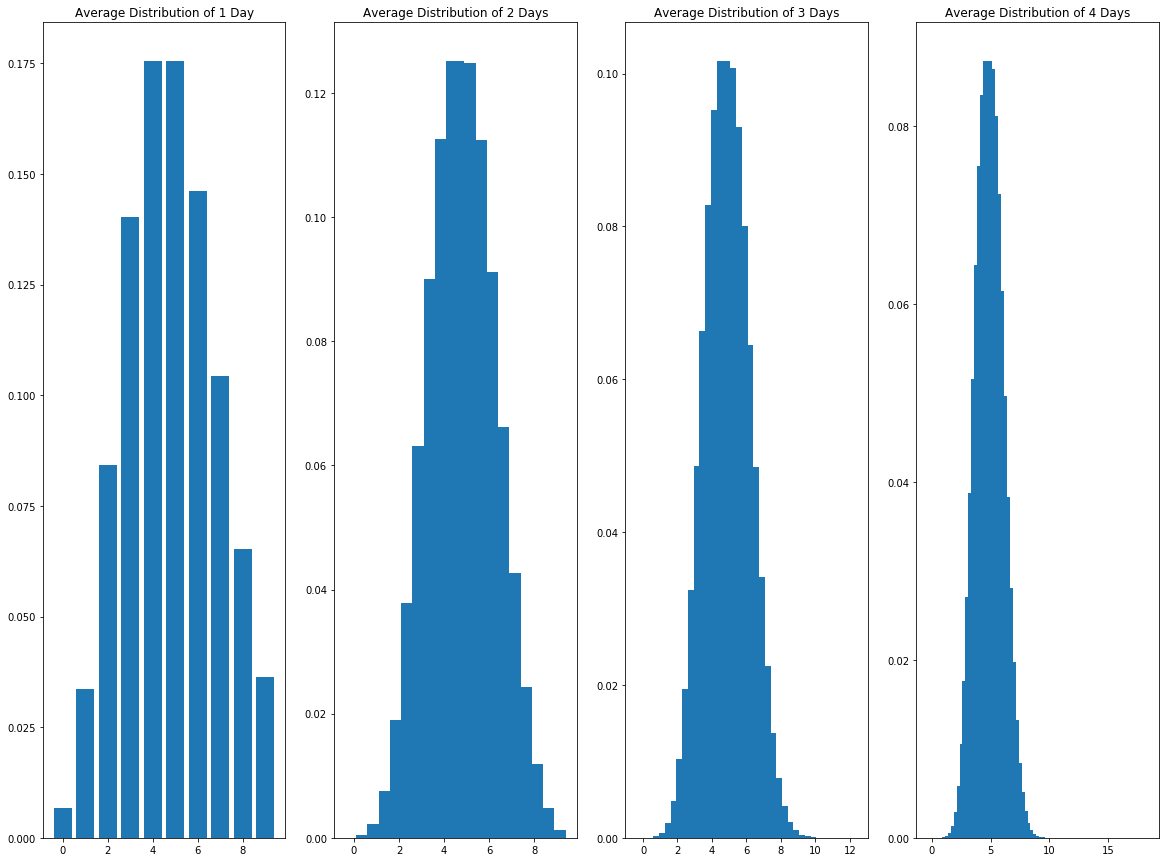

In [31]:
plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots(1, 4)
mu = 5 #average cosmic ray background
x = np.arange(0,10)
ax[0].set_title("Average Distribution of 1 Day")
ax[0].bar(x, stats.poisson.pmf(x, mu))

a = np.convolve(stats.poisson.pmf(x, mu), stats.poisson.pmf(x, mu))
x = np.arange(0, len(a))
ax[1].set_title("Average Distribution of 2 Days")
ax[1].bar(x/2, a)
for i in range(2,4):
    a = np.convolve(a, stats.poisson.pmf(x, mu))
    x = np.arange(0, len(a))
    ax[i].set_title("Average Distribution of " + str(i + 1) + " Days")
    ax[i].bar(x/(i+1), a)
b = a